In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
del titanic['Name']
del titanic['PassengerId']
del titanic['Ticket']
print (titanic.shape)
titanic.head()

(891, 9)


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

In [8]:
pd.isnull(titanic).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
    # since there are 687 null values out of 891 in Cabin, so we can remove the complete column
del titanic['Cabin']
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [10]:
    # now since the age have 177 null values out of 891 we should check whether we should delete the entire column or those rows
    # which have the null values or can enter the values into those null places
titanic.describe()
    # here we can see that the avg age is 29.699..

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [11]:
def getGender(str):
    if str == 'male':
        return 1    # 1 -> male
    else:
        return 2    # 2 -> female

titanic['Gender'] = titanic['Sex'].apply(getGender)
del titanic['Sex']
titanic.head()

Survived  Pclass   Age  SibSp  Parch     Fare Embarked  Gender
0         0       3  22.0      1      0   7.2500        S       1
1         1       1  38.0      1      0  71.2833        C       2
2         1       3  26.0      0      0   7.9250        S       2
3         1       1  35.0      1      0  53.1000        S       2
4         0       3  35.0      0      0   8.0500        S       1

In [12]:
    # now we have to check whether we should delete the entire column Embarked or the 2 rows that have NaN or enter values
    # into them, so we would check if the Embarked is affecting the survival or not.
S_S = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].Survived.count()
S_DS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].Survived.count()
print (S_S, S_DS)
C_S = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].Survived.count()
C_DS = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].Survived.count()
print (C_S, C_DS)
Q_S = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].Survived.count()
Q_DS = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].Survived.count()
print (Q_S, Q_DS)

    # since this data is severely affecting the survival rate, therefore we cannot delete the entire column
    # so now we delete the rows which have NaN values
    
    # alternative of dropna
print ('\n')
titanic = titanic[pd.notnull(titanic['Embarked'])]    # deleting the rows which has NaN in Embarked
titanic.shape

217 427
93 75
30 47




C:\Users\RyoKMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RyoKMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\RyoKMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\RyoKMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\RyoKMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\RyoKMR\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will b

(889, 8)

In [13]:
def getembarked(str):
    if str == 'S':
        return 1    # S -> 1
    elif str == 'C':
        return 2    # C -> 2
    else:
        return 3    # Q -> 3
    
titanic['embarked'] = titanic['Embarked'].apply(getembarked)
del titanic['Embarked']
titanic.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Gender  embarked
0         0       3  22.0      1      0   7.2500       1         1
1         1       1  38.0      1      0  71.2833       2         2
2         1       3  26.0      0      0   7.9250       2         1
3         1       1  35.0      1      0  53.1000       2         1
4         0       3  35.0      0      0   8.0500       1         1

In [14]:
    # now i'm gonna check avg age of the people survived and avg age of the people those who didn't survive
avg_ageS = titanic[titanic.Survived == 1].Age.mean()    # S -> Survived
avg_ageDS = titanic[titanic.Survived == 0].Age.mean()    # DS -> Didn't Survive
print (avg_ageS, avg_ageDS)
print(titanic.Age.min())

28.19329861111111 30.62617924528302
0.42


In [15]:
def isNaN(a):
    if a >= titanic['Age'].min() and a <= titanic['Age'].max():
        return False
    else:
        return True

def getage(str):
    if str[0] == 1 and isNaN(str[2]):    # if Survived and age NaN
        return avg_ageS
    elif str[0] == 0 and isNaN(str[2]):    # if Didn't Survive and age NaN
        return avg_ageDS
    else:
        return str[2]
    
titanic['age'] = titanic.apply(getage, axis = 1)
titanic

Survived  Pclass   Age  SibSp  Parch      Fare  Gender  embarked  \
0           0       3  22.0      1      0    7.2500       1         1   
1           1       1  38.0      1      0   71.2833       2         2   
2           1       3  26.0      0      0    7.9250       2         1   
3           1       1  35.0      1      0   53.1000       2         1   
4           0       3  35.0      0      0    8.0500       1         1   
5           0       3   NaN      0      0    8.4583       1         3   
6           0       1  54.0      0      0   51.8625       1         1   
7           0       3   2.0      3      1   21.0750       1         1   
8           1       3  27.0      0      2   11.1333       2         1   
9           1       2  14.0      1      0   30.0708       2         2   
10          1       3   4.0      1      1   16.7000       2         1   
11          1       1  58.0      0      0   26.5500       2         1   
12          0       3  20.0      0      0    8.0500       1         1   
13          0       3  39.0      1      5   31.2750       1         1   
14          0       3  14.0      0      0    7.8542       2         1   
15          1       2  55.0      0      0   16.0000       2         1   
16          0       3   2.0      4      1   29.1250       1         3   
17          1       2   NaN      0      0   13.0000       1         1   
18          0       3  31.0      1      0   18.0000       2         1   
19          1       3   NaN      0      0    7.2250       2         2   
20          0       2  35.0      0      0   26.0000       1         1   
21          1       2  34.0      0      0   13.0000       1         1   
22          1       3  15.0      0      0    8.0292       2         3   
23          1       1  28.0      0      0   35.5000       1         1   
24          0       3   8.0      3      1   21.0750       2         1   
25          1       3  38.0      1      5   31.3875       2         1   
26          0       3   NaN      0      0    7.2250       1         2   
27          0       1  19.0      3      2  263.0000       1         1   
28          1       3   NaN      0      0    7.8792       2         3   
29          0       3   NaN      0      0    7.8958       1         1   
..        ...     ...   ...    ...    ...       ...     ...       ...   
861         0       2  21.0      1      0   11.5000       1         1   
862         1       1  48.0      0      0   25.9292       2         1   
863         0       3   NaN      8      2   69.5500       2         1   
864         0       2  24.0      0      0   13.0000       1         1   
865         1       2  42.0      0      0   13.0000       2         1   
866         1       2  27.0      1      0   13.8583       2         2   
867         0       1  31.0      0      0   50.4958       1         1   
868         0       3   NaN      0      0    9.5000       1         1   
869         1       3   4.0      1      1   11.1333       1         1   
870         0       3  26.0      0      0    7.8958       1         1   
871         1       1  47.0      1      1   52.5542       2         1   
872         0       1  33.0      0      0    5.0000       1         1   
873         0       3  47.0      0      0    9.0000       1         1   
874         1       2  28.0      1      0   24.0000       2         2   
875         1       3  15.0      0      0    7.2250       2         2   
876         0       3  20.0      0      0    9.8458       1         1   
877         0       3  19.0      0      0    7.8958       1         1   
878         0       3   NaN      0      0    7.8958       1         1   
879         1       1  56.0      0      1   83.1583       2         2   
880         1       2  25.0      0      1   26.0000       2         1   
881         0       3  33.0      0      0    7.8958       1         1   
882         0       3  22.0      0      0   10.5167       2         1   
883         0       2  28.0      0      0   10.5000       1    

In [16]:
del titanic['Age']
titanic.head(10)

Survived  Pclass  SibSp  Parch     Fare  Gender  embarked        age
0         0       3      1      0   7.2500       1         1  22.000000
1         1       1      1      0  71.2833       2         2  38.000000
2         1       3      0      0   7.9250       2         1  26.000000
3         1       1      1      0  53.1000       2         1  35.000000
4         0       3      0      0   8.0500       1         1  35.000000
5         0       3      0      0   8.4583       1         3  30.626179
6         0       1      0      0  51.8625       1         1  54.000000
7         0       3      3      1  21.0750       1         1   2.000000
8         1       3      0      2  11.1333       2         1  27.000000
9         1       2      1      0  30.0708       2         2  14.000000

In [ ]:
    # Now the data is complete, now we draw graphs

# Graphs

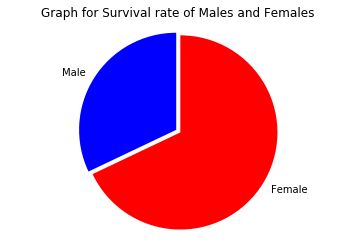

In [142]:
males = ((titanic['Gender'] == 1)&(titanic['Survived'] == 1)).sum()
females = ((titanic['Gender'] == 2)&(titanic['Survived'] == 1)).sum()

plt.pie([males, females],
       labels = ['Male', 'Female'],
       colors = ['blue', 'red'],
       explode = (0.05, 0),
       startangle = 90)
plt.title('Graph for Survival rate of Males and Females')
plt.axis('equal')
plt.show()

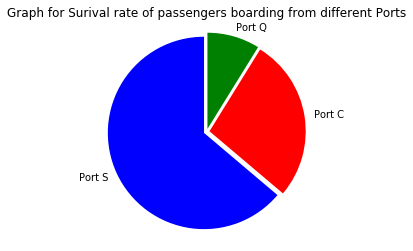

In [153]:
S = ((titanic['embarked'] == 1)&(titanic['Survived'] == 1)).sum()
C = ((titanic['embarked'] == 2)&(titanic['Survived'] == 1)).sum()
Q = ((titanic['embarked'] == 3)&(titanic['Survived'] == 1)).sum()

plt.pie([S, C, Q],
       labels = ['Port S', 'Port C', 'Port Q'],
       colors = ['blue', 'red', 'g'],
       explode = (0.03, 0.03, 0.03),
       startangle = 90)
plt.title('Graph for Surival rate of passengers boarding from different Ports')
plt.axis('equal')
plt.show()